In [6]:
import pandas
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [7]:
data = pandas.read_excel("all_1nm_data.xls", header=0, skiprows=3)
#data

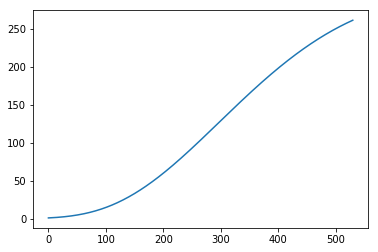

In [8]:
lights = data[data.columns[1:3]]
light = numpy.array(lights[lights.columns[0]])
nan_locs = numpy.isnan(light)
light[nan_locs] = 0
plt.plot(light)
plt.show()

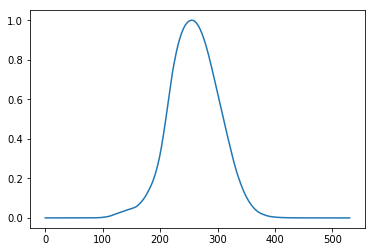

In [9]:
mats = data[data.columns[3:5]]
mat = numpy.array(mats[mats.columns[0]])
nan_locs = numpy.isnan(mat)
mat[nan_locs] = 0
plt.plot(mat)
plt.show()

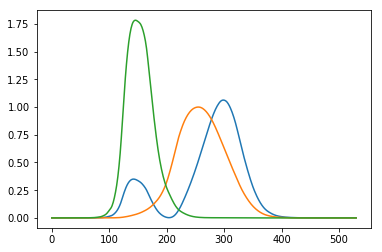

In [10]:
refs = [data[data.columns[5:8]],data[data.columns[8:12]]]
ref = refs[0]
ref = [numpy.array(ref[ref.columns[0]]),numpy.array(ref[ref.columns[1]]),numpy.array(ref[ref.columns[2]])]
for r in ref:
    nan_locs = numpy.isnan(r)
    r[nan_locs] = 0
plt.plot(ref[0])
plt.plot(ref[1])
plt.plot(ref[2])
plt.show()

(531,)

In [18]:
def CIEXYZ(beta,L,CIE,debug=False): 
    refl = beta*L
    px = refl*CIE[0]
    py = refl*CIE[1]
    pz = refl*CIE[2]
    yl = L*CIE[1]
    k = 1./numpy.sum(yl)
    
    if debug:
        plt.plot(refl)
        plt.show()
        
        plt.plot(px)
        plt.plot(CIE[0])
        plt.show()
        
        plt.plot(py)
        plt.plot(CIE[1])
        plt.show()
        
        plt.plot(pz)
        plt.plot(CIE[2])
        plt.show()
        
    p = [numpy.sum(px)*k,numpy.sum(py)*k,numpy.sum(pz)*k]
    return p

In [113]:
xyz = CIEXYZ(mat,light,ref,False)
xyz = [0.6049185566818934, 0.7134076099404171, 0.14287433425362352]

In [79]:
def White(L,CIE): 
    px = L*CIE[0]
    py = L*CIE[1]
    pz = L*CIE[2]
    k = numpy.sum(py)
    p = [numpy.sum(px)/k,1.0,numpy.sum(pz)/k]
    return p

In [114]:
#D65 =  [0.95043, 1, 1.08890]
white = White(light,ref)
white

[1.0985031526845566, 1.0, 0.3558493013388848]

In [42]:
def CIExyY(xyz,light,ref):
    if not numpy.any(xyz):# xyz = [0,0,0]
        py = White(light,ref)[1]
    else:    
        py = xyz[1]
    px = xyz[0]
    pz = xyz[2]
    tot = px+py+pz
    p = [px/tot,py/tot,py]
    return p

In [115]:
CIExyY(xyz,light,ref)

[0.41398737293018156, 0.48823389364618774, 0.7134076099404171]

In [71]:
def cube(x):
    if 0<=x: return x**(1./3.)
    return -(-x)**(1./3.)

def f(v):
    eps = 0.008856
    k = 903.3
    if v > eps:
        return cube(v)
    return (k*v+16)/116 

def CIELab(xyz,light,ref):
    Refxyz = [0.95043, 1, 1.08890]#White(light,ref)
    print(xyz)
    _xyz = [xyz[0]/Refxyz[0],xyz[1]/Refxyz[1],xyz[2]/Refxyz[2]]
    print(_xyz)
    fxyz = [f(_xyz[0]),f(_xyz[1]),f(_xyz[2])]
    print(fxyz)
    L = 116*fxyz[1]-16
    a = 500*(fxyz[0]-fxyz[1])
    b = 200*(fxyz[1]-fxyz[2])
    p = [L,a,b]
    return p

In [116]:
CIELab(xyz,light,ref)

[0.6049185566818934, 0.7134076099404171, 0.14287433425362353]
[0.6364682898076591, 0.7134076099404171, 0.13120978441879286]
[0.8601857764368152, 0.8935370792852388, 0.5081462683811484]


[87.6503011970877, -16.675651424211846, 77.07816218081808]

In [84]:
sRGBref = [[ 3.2404542, -1.5371385, -0.4985314],
           [ -0.9692660,  1.8760108,  0.0415560],
           [ 0.0556434, -0.2040259,  1.0572252]]

In [117]:
def compand(v):
    if v <= 0.0031308 :
        return v * 12.92
    else:
        return (v ** (1./2.4))*1.055-0.055

def sRGB(xyz):
    rgb = numpy.dot(sRGBref,xyz)
    rgb = [ compand(i) for i in rgb]
    return rgb
sRGB(xyz)

[0.9025044214881456, 0.8849562248000177, 0.21847678741915938]

In [137]:

def Plot(beta,light,ref):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pp = CIEXYZ(beta,light,ref)
    rgb = numpy.array([sRGB(pp)])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter([pp[0]], [pp[1]], [pp[2]], c=rgb)

def Plotmult(betas,light,ref):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    px = []
    py = []
    pz = []
    rgb = []
    for b in betas:
        pp = CIEXYZ(b,light,ref)
        px += [pp[0]]
        py += [pp[1]]
        pz += [pp[2]]
        rgb += numpy.array([sRGB(pp)])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.scatter(px, py, pz, c=rgb)
    


In [132]:

def genbetas(n):
    betas = []
    for i in numpy.linspace(0,1,11):
        betas += [[i]*n]
    return betas

n = numpy.shape(mat)
betas = genbetas(n[0])

ValueError: operands could not be broadcast together with shapes (0,) (1,3) 

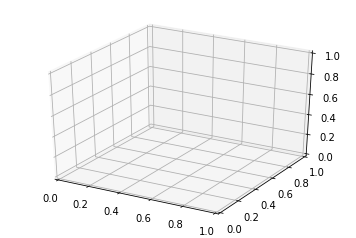

In [138]:
Plotmult(betas,light,ref)